In [1]:
import pandas as pd
import numpy as np

In [3]:
TransHistDF = read.csv("../data/transhist.csv", 
                          #encoding="Windows-1252/WinLatin 1", 
                          sep=";", dec =","
                          #header = FALSE
                                )

In [4]:
nrow(TransHistDF)
TransHistDF<-na.omit(TransHistDF)
nrow(TransHistDF)
head(TransHistDF)

[1] 51845

[1] 51845

,MedioPago,HoraServidor,FechaTerminal,CodigoParquimetro,Importe,ImporteRecargado,DuracionTotal,DuracionPagada,DuracionTotalMinutos,DuracionPagadaMinutos,IDSistema,CodigoParque,Tipo,TipoUsuario,FechaFinal
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>
1,Monedas,1/1/19 3:13,1/1/19 3:12,87,1.0,0,197 h 47 m,66 h,11867,3960,330063474,612,Parking,4,9/1/19 9:00
2,Monedas,1/1/19 10:30,1/1/19 10:29,87,1.0,0,190 h 30 m,66 h,11430,3960,330066700,612,Parking,4,9/1/19 9:00
3,Monedas,1/1/19 11:02,1/1/19 11:01,87,1.0,0,189 h 59 m,66 h,11399,3960,330066803,612,Parking,4,9/1/19 9:00
4,Monedas,1/1/19 12:03,1/1/19 12:02,77,1.0,0,188 h 57 m,66 h,11337,3960,330067075,612,Parking,4,9/1/19 9:00
5,Monedas,1/1/19 13:08,1/1/19 13:08,80,1.0,0,187 h 51 m,66 h,11271,3960,330067588,612,Parking,4,9/1/19 9:00
6,Monedas,1/1/19 13:17,1/1/19 13:17,80,0.2,0,43 h 43 m,11 h,2623,660,330067678,612,Parking,4,3/1/19 9:00


In [9]:
library(lubridate)
TransHistDF$FechaTerminal <- dmy_hm(TransHistDF$FechaTerminal)
TransHistDF$FechaFinal <- dmy_hm(TransHistDF$FechaFinal)
TransHistDF<-na.omit(TransHistDF)
nrow(TransHistDF)
head(TransHistDF)

[1] 51845

,MedioPago,HoraServidor,FechaTerminal,CodigoParquimetro,Importe,ImporteRecargado,DuracionTotal,DuracionPagada,DuracionTotalMinutos,DuracionPagadaMinutos,IDSistema,CodigoParque,Tipo,TipoUsuario,FechaFinal
,<chr>,<chr>,<dttm>,<int>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<dttm>
1,Monedas,1/1/19 3:13,2019-01-01 03:12:00,87,1.0,0,197 h 47 m,66 h,11867,3960,330063474,612,Parking,4,2019-01-09 09:00:00
2,Monedas,1/1/19 10:30,2019-01-01 10:29:00,87,1.0,0,190 h 30 m,66 h,11430,3960,330066700,612,Parking,4,2019-01-09 09:00:00
3,Monedas,1/1/19 11:02,2019-01-01 11:01:00,87,1.0,0,189 h 59 m,66 h,11399,3960,330066803,612,Parking,4,2019-01-09 09:00:00
4,Monedas,1/1/19 12:03,2019-01-01 12:02:00,77,1.0,0,188 h 57 m,66 h,11337,3960,330067075,612,Parking,4,2019-01-09 09:00:00
5,Monedas,1/1/19 13:08,2019-01-01 13:08:00,80,1.0,0,187 h 51 m,66 h,11271,3960,330067588,612,Parking,4,2019-01-09 09:00:00
6,Monedas,1/1/19 13:17,2019-01-01 13:17:00,80,0.2,0,43 h 43 m,11 h,2623,660,330067678,612,Parking,4,2019-01-03 09:00:00


In [11]:
TransHistDF <- TransHistDF[order(TransHistDF$FechaTerminal),]
datemin <- floor_date(TransHistDF[1,3],"day")
datemax <- round_date(TransHistDF[51845,3],"day")
span<- datemax-datemin
span
datemin
datemax

Time difference of 161 days

[1] "2019-01-01 UTC"

[1] "2019-06-11 UTC"

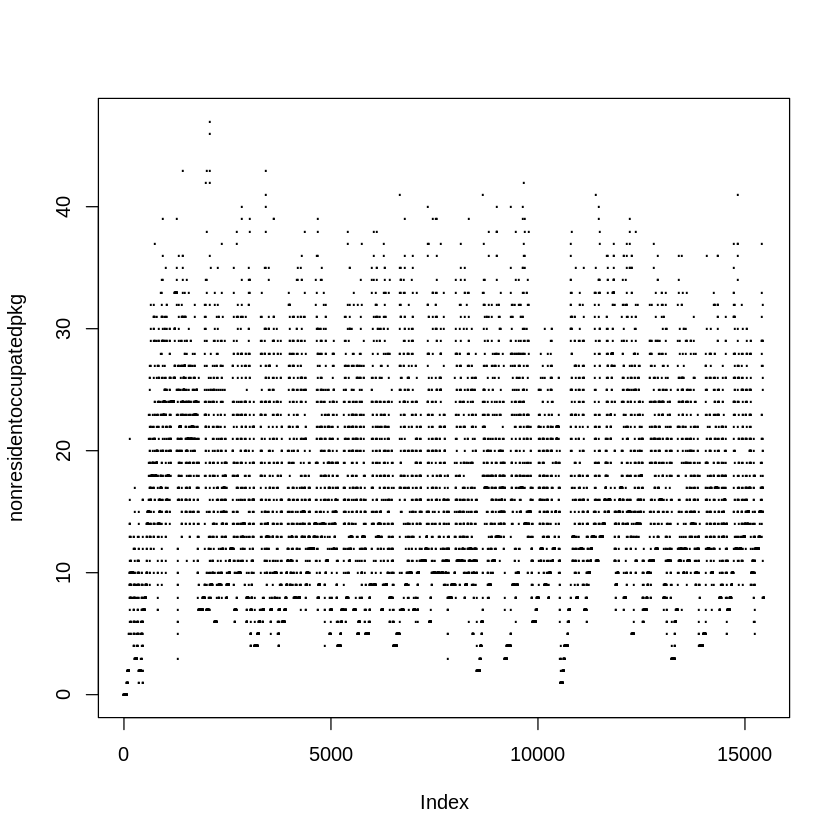

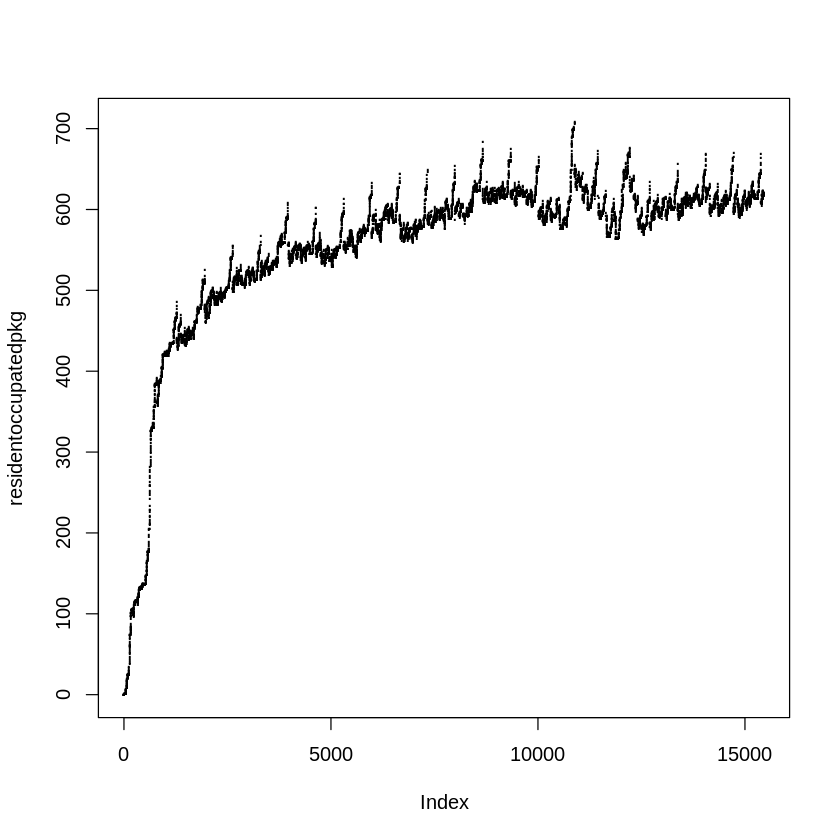

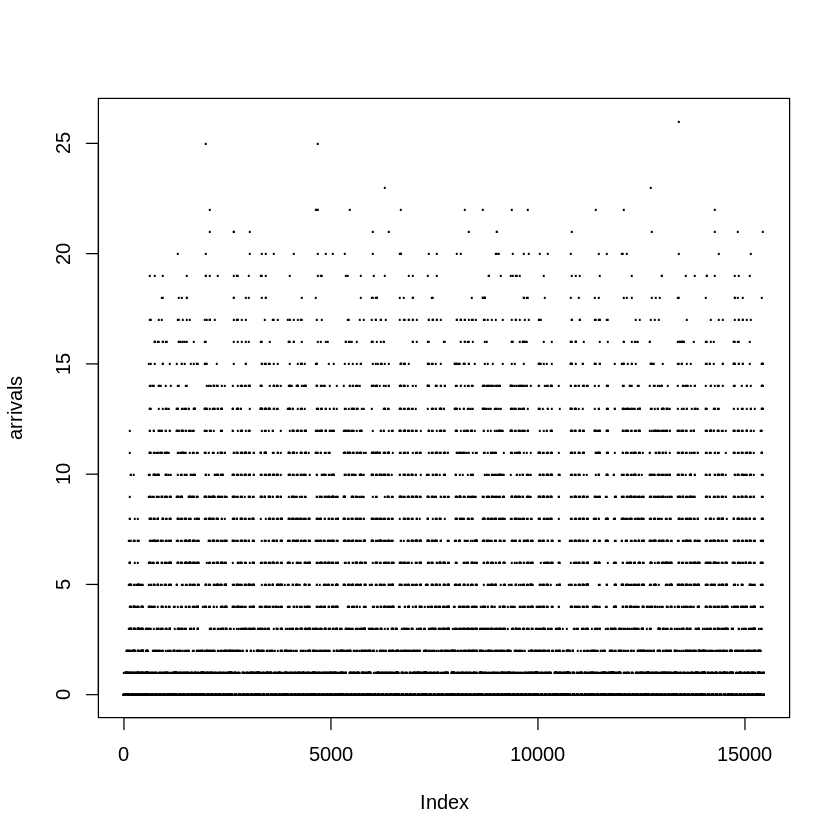

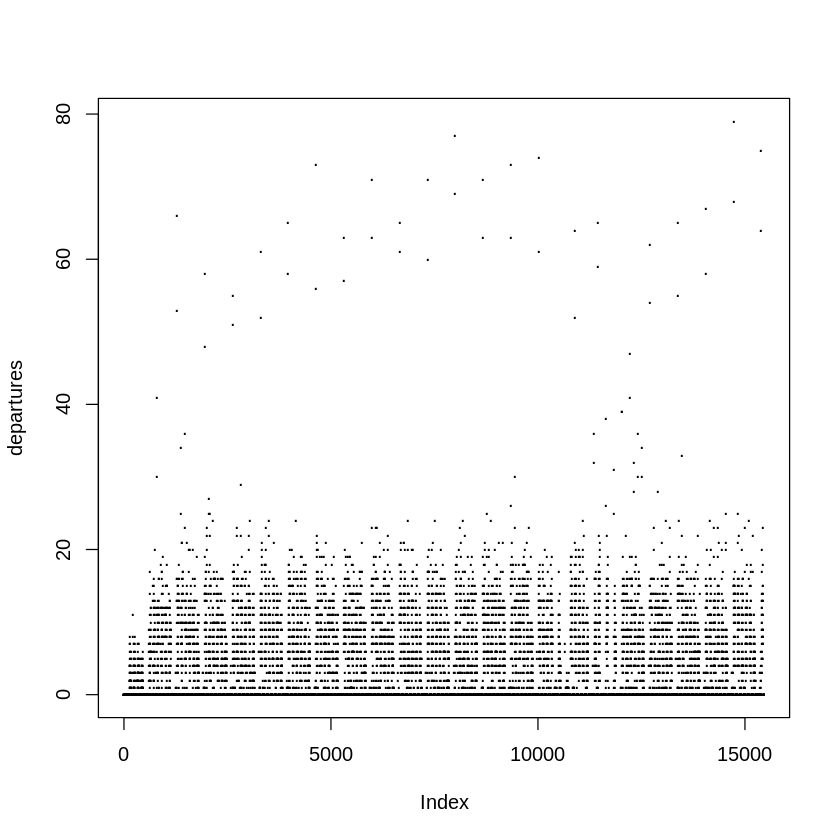

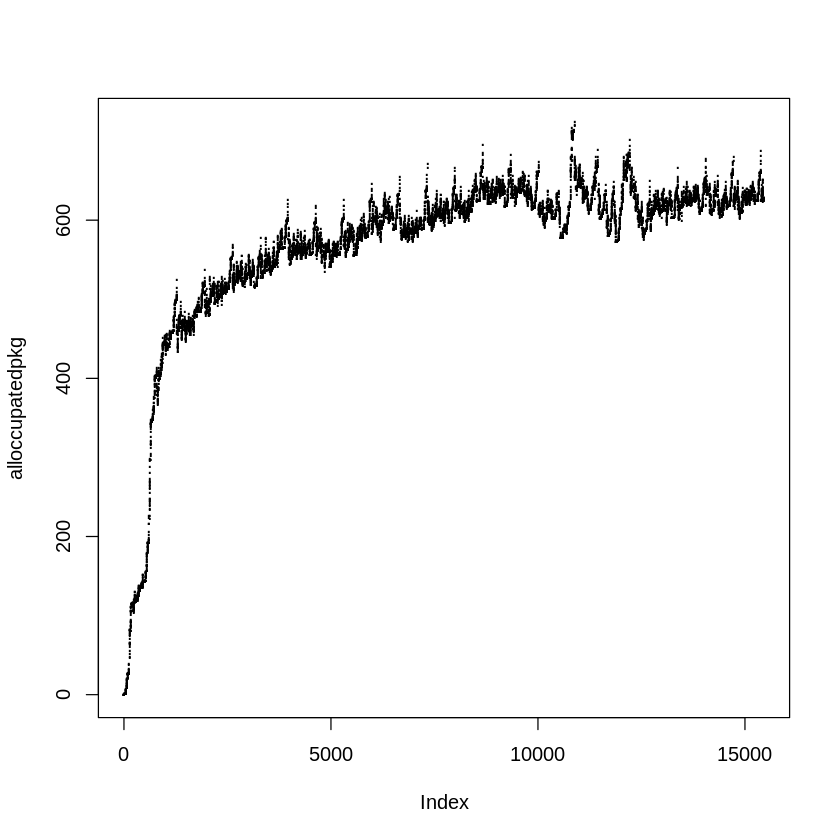

In [12]:
nonresidentoccupatedpkg<-c(15460)
residentoccupatedpkg<-c(15460)
alloccupatedpkg<-c(15460)
arrivals<-c(15460)
departures<-c(15460)
lowlim<-datemin
for (i in 1:15460) {
    interv <-interval(lowlim,lowlim+dminutes(15))
    nonresidentoccupatedpkg[i]<-nrow(TransHistDF[(TransHistDF$FechaTerminal< lowlim)&(TransHistDF$TipoUsuario!=4),])-nrow(TransHistDF[(TransHistDF$FechaFinal< lowlim)&(TransHistDF$TipoUsuario!=4),])
    residentoccupatedpkg[i]<-nrow(TransHistDF[(TransHistDF$FechaTerminal< lowlim)&(TransHistDF$TipoUsuario==4),])-nrow(TransHistDF[(TransHistDF$FechaFinal< lowlim)&(TransHistDF$TipoUsuario==4),])
    arrivals[i]<-nrow(TransHistDF[(TransHistDF$FechaTerminal %within% interv),])
    departures[i]<-nrow(TransHistDF[(TransHistDF$FechaFinal %within% interv),])
    alloccupatedpkg[i] <- nrow(TransHistDF[(TransHistDF$FechaTerminal< lowlim),])-nrow(TransHistDF[(TransHistDF$FechaFinal< lowlim),])
    lowlim<-lowlim+dminutes(15)
}

plot(nonresidentoccupatedpkg, pch="·")
plot(residentoccupatedpkg, pch="·")
plot(arrivals, pch="·")
plot(departures, pch="·")
plot(alloccupatedpkg, pch="·")
abline(h=792, col="red")

In [13]:
write.table(alloccupatedpkg,"./alloccupatedpkg.csv", sep=";")

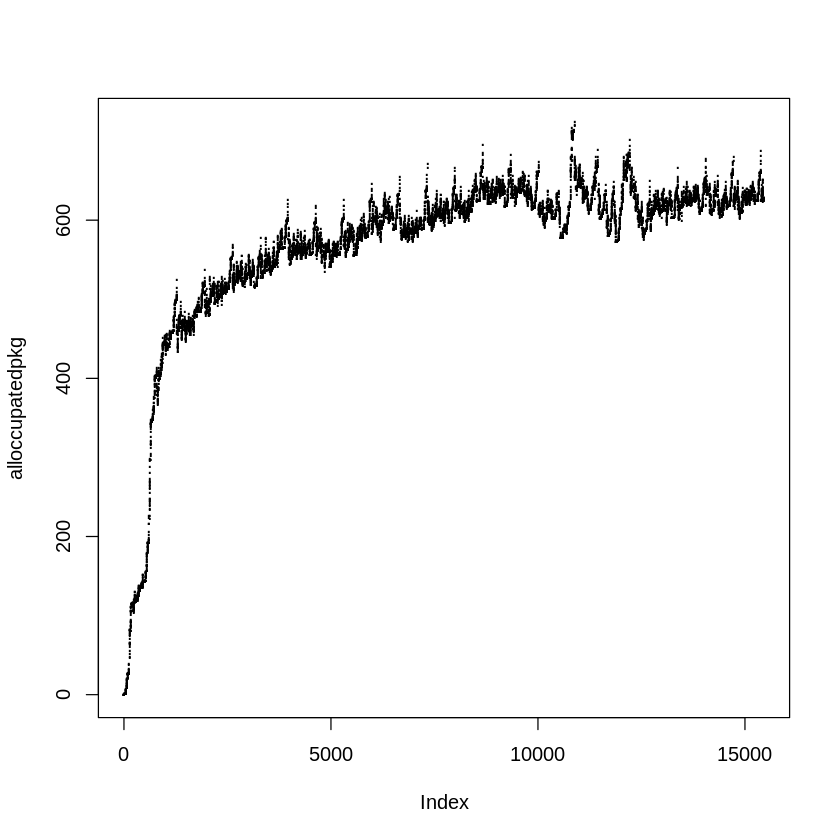

In [14]:
plot(alloccupatedpkg, pch="·")
abline(h=792, col="red")

In [18]:
#library(dplyr)
Parquimetres<-unique(TransHistDF$CodigoParquimetro)
Parquimetres[order(Parquimetres)]

[1] 75 76 77 78 79 80 81 82 83 84 85 86 87 88

In [21]:
summary(alloccupatedpkg[4000:7750])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  573,0   614,0   626,0   626,8   638,0   725,0 